In [212]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, balanced_accuracy_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, chi2
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.preprocessing import QuantileTransformer

hypertesion_data = pd.read_csv('/Users/wiizh/CS249 Final Project/hypertension_data.csv')

hypertesion_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26083.000000,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253
std,15.189768,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


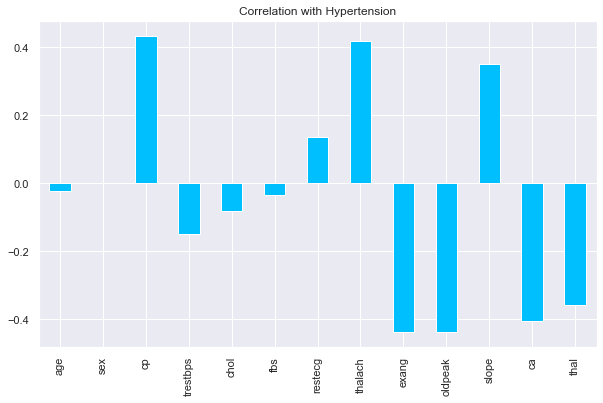

In [196]:
hypertesion_data.drop('target', axis=1).corrwith(hypertesion_data.target).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Hypertension",color="deepskyblue");

In [197]:
hypertesion_data_vis = hypertesion_data.copy()
hypertesion_data_vis.slope[hypertesion_data_vis['slope'] == 0] = 'up slope'
hypertesion_data_vis.slope[hypertesion_data_vis['slope'] == 1] = 'flat'
hypertesion_data_vis.slope[hypertesion_data_vis['slope'] == 2] = 'down slope'

hypertesion_data_vis.head(3)

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/2833771360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypertesion_data_vis.slope[hypertesion_data_vis['slope'] == 0] = 'up slope'


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,up slope,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,up slope,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,down slope,0,2,1


<AxesSubplot:>

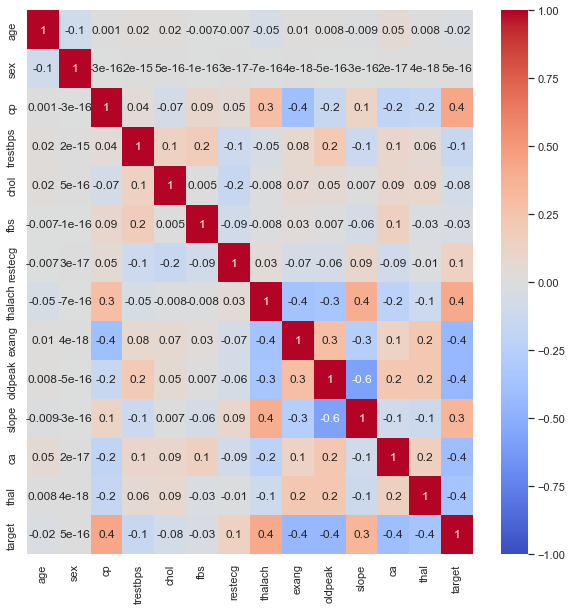

In [198]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(hypertesion_data.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

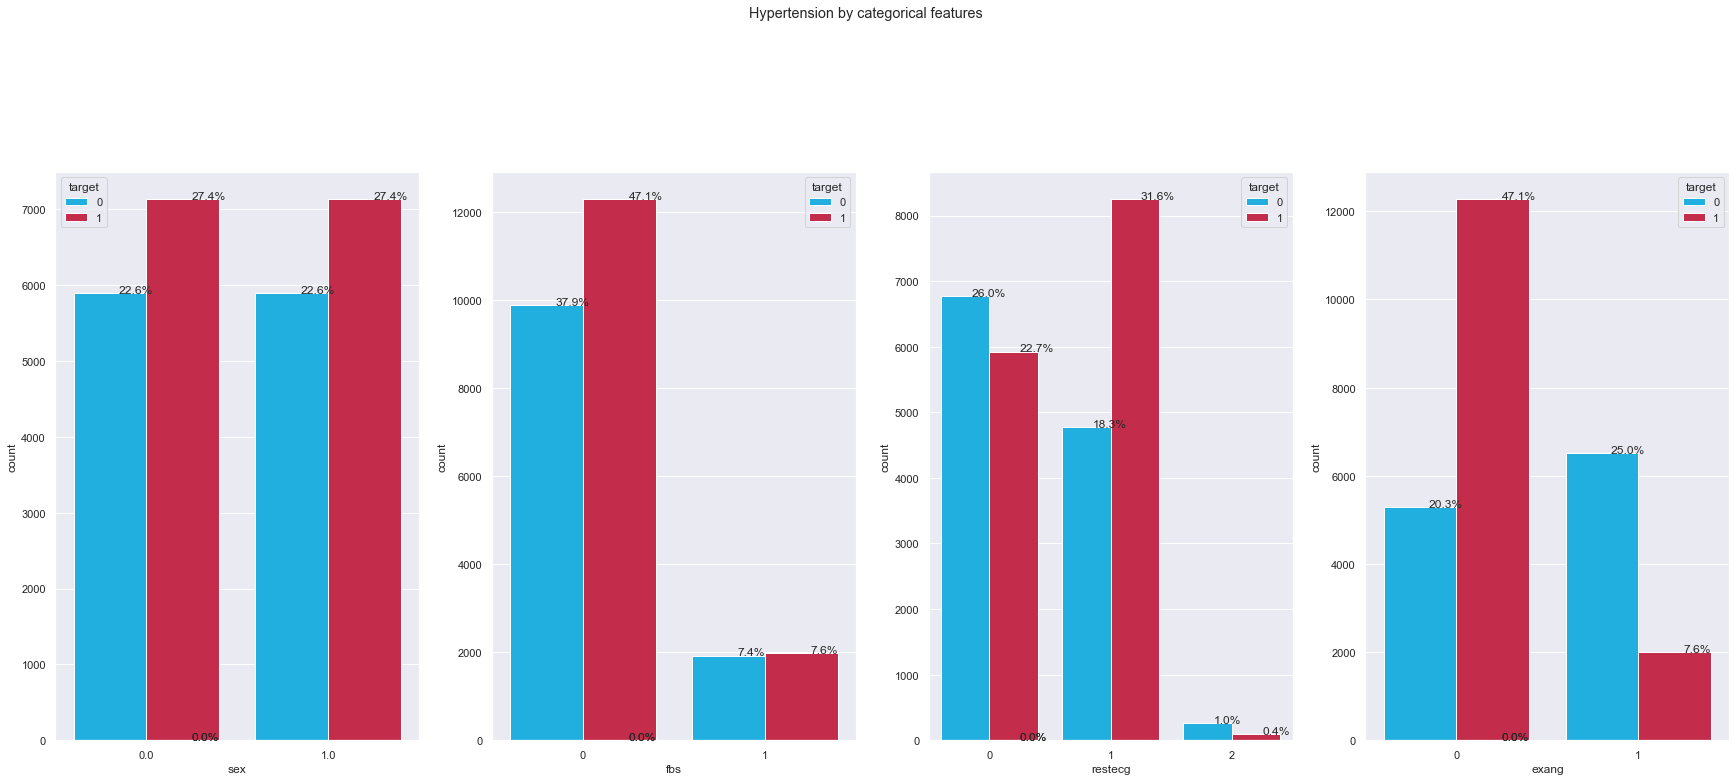

In [199]:
features = [x for x in hypertesion_data.columns if x in ['sex', 'restecg', 'fbs', 'exang']]
plt.figure(figsize = (30,23))
plt.suptitle('Hypertension by categorical features')
#subplots
for i, feature in enumerate(features):
    plt.subplot(2,4, i+1)
    x = sns.countplot(x=feature ,hue='target', data=hypertesion_data, palette = ['deepskyblue','crimson'])
    for z in x.patches:
      x.annotate('{:.1f}'.format((z.get_height()/hypertesion_data.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

In [200]:
#scale the data before pairplot
data_pairplot = hypertesion_data
float_columns = [x for x in hypertesion_data.columns if x in ['slope','cp','thalach']]

sc = StandardScaler()
data_pairplot[float_columns] = sc.fit_transform(data_pairplot[float_columns])
data_pairplot.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,1.993733,145,233,1,0,0.015092,0,2.3,-2.271363,0,1,1
1,64.0,0.0,1.017086,130,250,0,1,1.633805,0,3.5,-2.271363,0,2,1
2,52.0,1.0,0.040439,130,204,0,0,0.977570,0,1.4,0.972748,0,2,1
3,56.0,0.0,0.040439,120,236,0,1,1.240064,0,0.8,0.972748,0,2,1


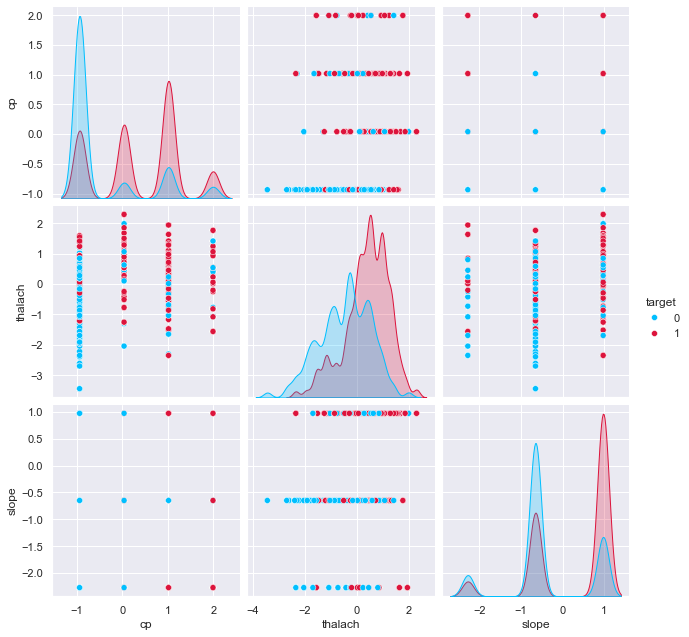

In [201]:
float_columns = [x for x in data_pairplot.columns if x in ['slope','cp','thalach']]
sns.set_context('notebook')
sns.pairplot(data_pairplot[float_columns + ['target']], 
             hue='target', 
             hue_order=[0,1],
             height=3,
             palette={0:'deepskyblue',1:'crimson'});

cp,asymptomatic,typical angina,atypical angina,non-anginal pain
target,,,,
0,8930.0,776.0,1532.0,571.0
1,3384.0,3680.0,5860.0,1350.0


<Figure size 864x360 with 0 Axes>

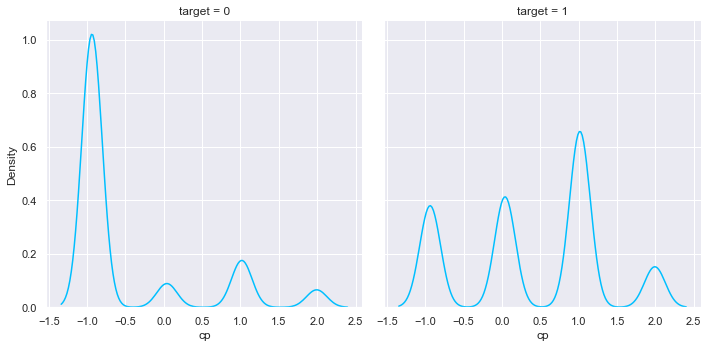

In [202]:
plt.figure(figsize=(12,5))
sns.displot(x='cp', col='target' , data = hypertesion_data, kind="kde" ,color = 'deepskyblue');

cp = pd.cut( hypertesion_data['cp'],bins=[-1.5,-0.5,0.5,1.5,2.5],labels=['asymptomatic','typical angina','atypical angina','non-anginal pain'])
cp_temp = pd.crosstab(hypertesion_data['target'],cp,rownames=['target'])
cp_temp = cp_temp.astype(float)
cp_temp


<Figure size 864x1440 with 0 Axes>

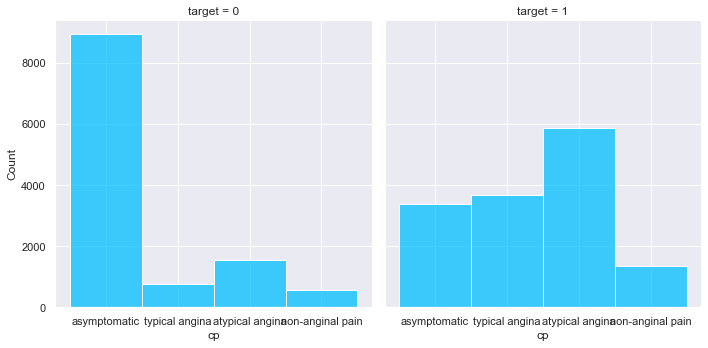

In [203]:
#
cp_temp_sum_lst=list(cp_temp.transpose().sum().values)
for idx in range(cp_temp.values.shape[0]):
    cp_temp.values[idx]= cp_temp.values[idx]/cp_temp_sum_lst[idx]*100

cp_temp

plt.figure(figsize=(12,20))
sns.displot(data=hypertesion_data,col='target',x=cp,color='deepskyblue');

thalach,71-90.65,90.65-103.75,103.75-116.85,116.85-129.95,129.95-143.05,143.05-156.15,156.15-202.00
target,,,,,,,
0,82.0,692.0,2730.0,4082.0,3569.0,654.0,0.0
1,0.0,84.0,1216.0,2448.0,7186.0,3232.0,108.0


<Figure size 864x360 with 0 Axes>

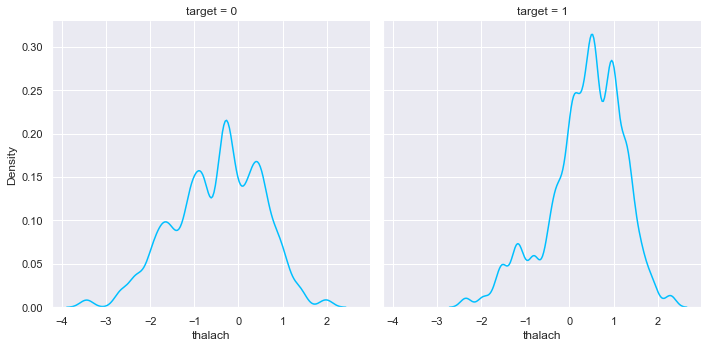

In [204]:
plt.figure(figsize=(12,5))
sns.displot(x='thalach', col='target' , data = hypertesion_data, kind="kde" ,color = 'deepskyblue');

thalach = pd.cut( hypertesion_data['thalach'],bins=[-4,-3,-2,-1,0,1,2,2.5],labels=['71-90.65','90.65-103.75','103.75-116.85',
'116.85-129.95','129.95-143.05','143.05-156.15','156.15-202.00'])
thalach_temp = pd.crosstab(hypertesion_data['target'],thalach,rownames=['target'])
thalach_temp = thalach_temp.astype(float)
thalach_temp


<Figure size 864x1440 with 0 Axes>

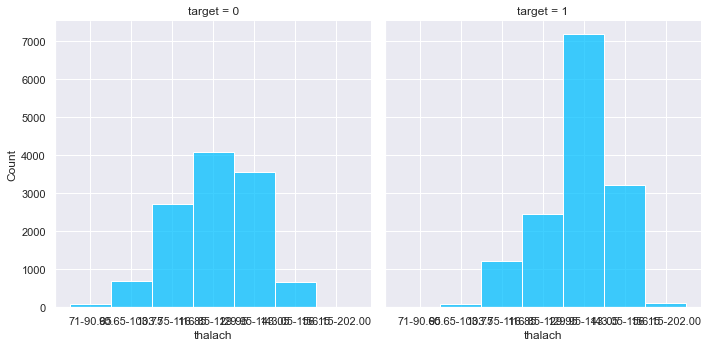

In [205]:
plt.figure(figsize=(12,20))
sns.displot(data=hypertesion_data,col='target',x=thalach,color='deepskyblue');

slope,upsloping,flat,downsloping
target,,,
0,1070.0,7742.0,2997.0
1,756.0,4248.0,9270.0


<Figure size 864x360 with 0 Axes>

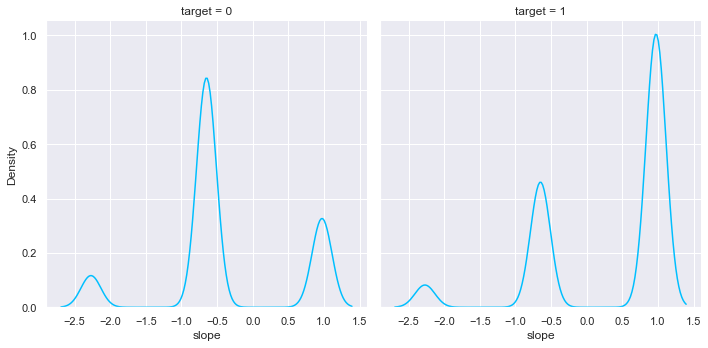

In [206]:
plt.figure(figsize=(12,5))
sns.displot(x='slope', col='target' , data = hypertesion_data, kind="kde" ,color = 'deepskyblue');

slope = pd.cut( hypertesion_data['slope'],bins=[-2.75,-1.5,0,1.5],labels=['upsloping','flat','downsloping'])
slope_temp = pd.crosstab(hypertesion_data['target'],slope,rownames=['target'])
slope_temp = slope_temp.astype(float)
slope_temp

<Figure size 864x1440 with 0 Axes>

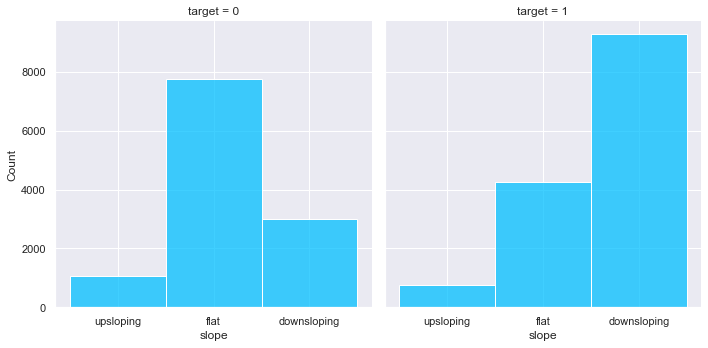

In [207]:
plt.figure(figsize=(12,20))
sns.displot(data=hypertesion_data,col='target',x=slope,color='deepskyblue');

restecg,normal,ST-T wave abnormality
target,,
0,6776.0,5033.0
1,5926.0,8348.0


<Figure size 864x360 with 0 Axes>

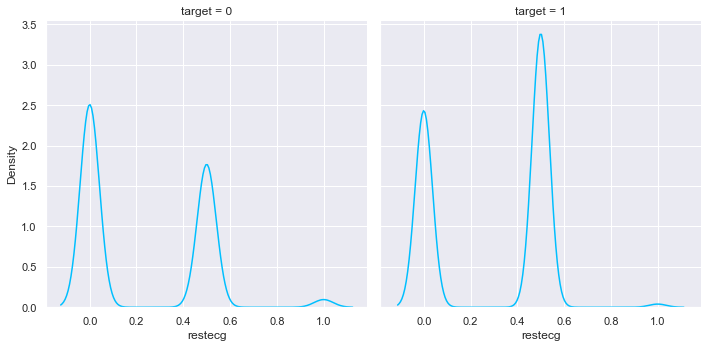

In [292]:
plt.figure(figsize=(12,5))
sns.displot(x='restecg', col='target' , data = hypertesion_data, kind="kde" ,color = 'deepskyblue');

restecg = pd.cut(hypertesion_data['restecg'],bins=[-0.75,0.5,1.5,2.6],labels=['normal','ST-T wave abnormality','probable'])
restecg_temp = pd.crosstab(hypertesion_data['target'],restecg,rownames=['target'])
restecg_temp = restecg_temp.astype(float)
restecg_temp

<Figure size 864x1440 with 0 Axes>

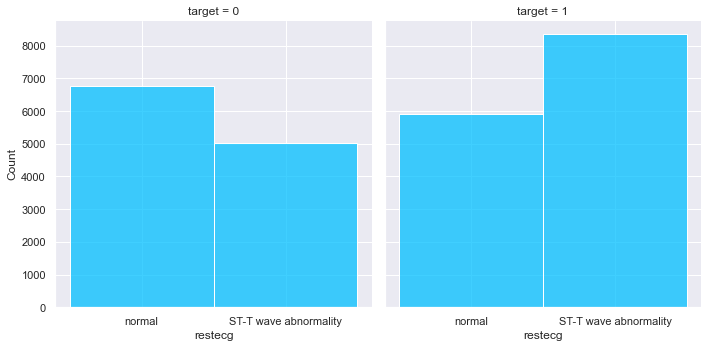

In [293]:
plt.figure(figsize=(12,20))
sns.displot(data=hypertesion_data,col='target',x=restecg,color='deepskyblue');

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/1315614673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hypertesion_data, x=i[1], y=col ,palette = ['deepskyblue','crimson'], ax=ax)
/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/1315614673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hypertesion_data, x=i[1], y=col ,palette = ['deepskyblue','crimson'], ax=ax)
/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/1315614673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot

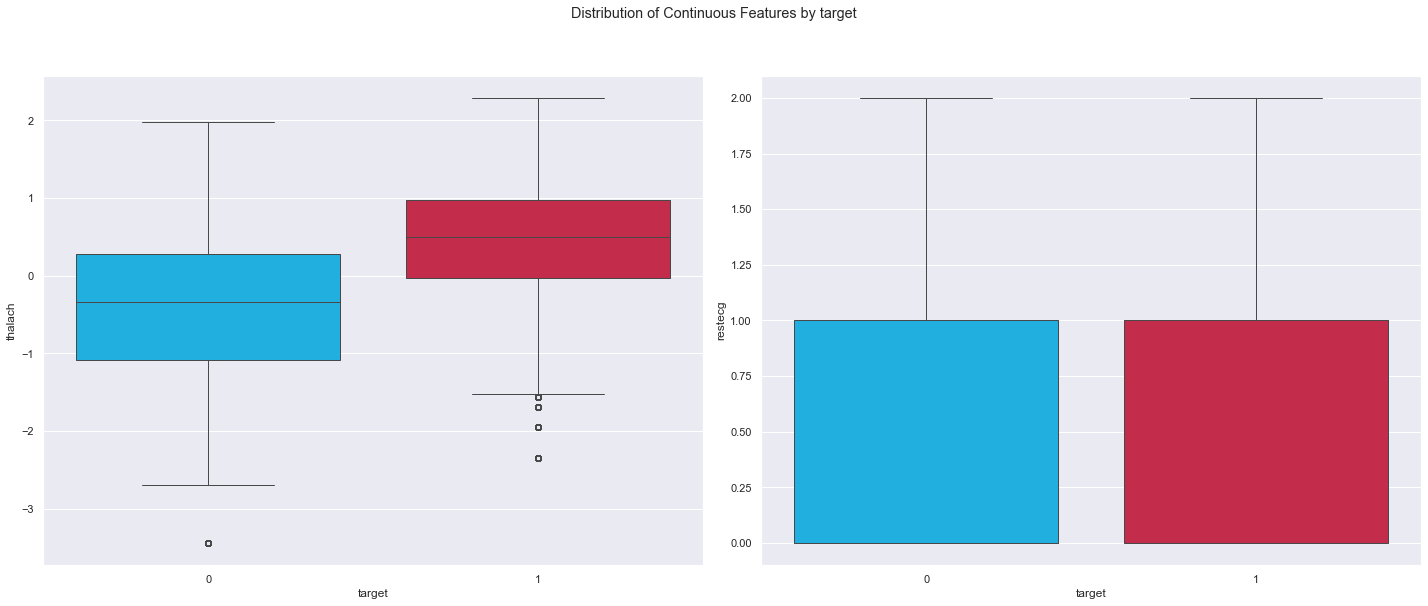

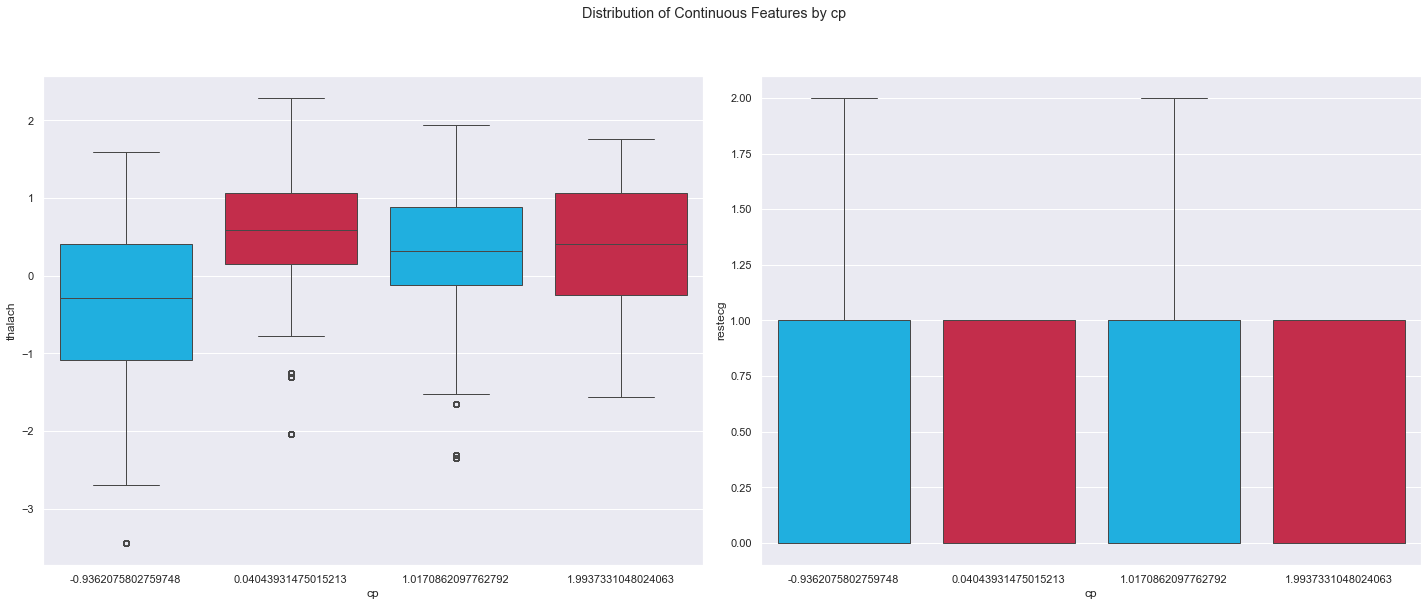

In [209]:
features = ['target','cp']
for i in enumerate(features):
  box_cols = ['thalach','restecg']
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
  fig.suptitle('Distribution of Continuous Features by '+i[1], y = 1.05);
  for col, ax in zip(box_cols, axes.ravel()):
      sns.boxplot(data=hypertesion_data, x=i[1], y=col ,palette = ['deepskyblue','crimson'], ax=ax)
  plt.tight_layout()

plt.figure(figsize=(8,6))
x = sns.countplot(x='slope' ,hue='target', data=hypertesion_data_vis, palette = ['deepskyblue','crimson'])
for z in x.patches:
    x.annotate('{:.1f}'.format((z.get_height()/hypertesion_data_vis.shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

In [213]:
hypertesion_data.slope[hypertesion_data['slope'] == 0] = 'up slope'
hypertesion_data.slope[hypertesion_data['slope'] == 1] = 'normal'
hypertesion_data.slope[hypertesion_data['slope'] == 2] = 'down slope'
one_hot_encode_cols = ['slope']  # filtering by string categoricals
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    hypertesion_data[col] = pd.Categorical(hypertesion_data[col])
# Do the one hot encoding
hypertesion_data = pd.get_dummies(hypertesion_data, columns=one_hot_encode_cols)
hypertesion_data.head()

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/1171724562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypertesion_data.slope[hypertesion_data['slope'] == 0] = 'up slope'


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target,slope_down slope,slope_normal,slope_up slope
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,1,1,0,0,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,2,1,0,0,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,0,2,1,1,0,0
3,56.0,0.0,1,120,236,0,1,178,0,0.8,0,2,1,1,0,0
4,66.0,0.0,0,120,354,0,1,163,1,0.6,0,2,1,1,0,0


In [214]:
#Skewness Checking
data_skew = hypertesion_data[['cp','thalach','restecg','slope_down slope', 'slope_normal','slope_up slope']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
cp,0.494495,False
thalach,-0.521341,False
restecg,0.172989,False
slope_down slope,0.118992,False
slope_normal,0.161790,False
slope_up slope,3.370580,True


In [228]:
qt = QuantileTransformer(n_quantiles=5000, output_distribution='normal')
hypertesion_data[['slope_up slope']] = qt.fit_transform(hypertesion_data[['slope_up slope']])

data_skew = hypertesion_data[['cp','thalach','restecg','slope_down slope', 'slope_normal','slope_up slope']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
cp,0.494495,False
thalach,-0.521341,False
restecg,0.172989,False
slope_down slope,0.118992,False
slope_normal,0.161790,False
slope_up slope,3.370580,True


In [229]:
sc = StandardScaler()
hypertesion_data[['cp']] = sc.fit_transform(hypertesion_data[['cp']])
hypertesion_data[['thalach']] = sc.fit_transform(hypertesion_data[['thalach']])
hypertesion_data[['restecg']] = sc.fit_transform(hypertesion_data[['restecg']])
hypertesion_data[['slope_down slope']] = sc.fit_transform(hypertesion_data[['slope_down slope']])
hypertesion_data[['slope_normal']] = sc.fit_transform(hypertesion_data[['slope_normal']])
hypertesion_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target,slope_down slope,slope_normal,slope_up slope
0,57.0,1.0,1.993733,145,233,1,-1.001675,0.015092,0,2.3,0,1,1,-0.942276,-0.922376,5.199338
1,64.0,0.0,1.017086,130,250,0,0.900800,1.633805,0,3.5,0,2,1,-0.942276,-0.922376,5.199338
2,52.0,1.0,0.040439,130,204,0,-1.001675,0.977570,0,1.4,0,2,1,1.061260,-0.922376,-5.199338
3,56.0,0.0,0.040439,120,236,0,0.900800,1.240064,0,0.8,0,2,1,1.061260,-0.922376,-5.199338
4,66.0,0.0,-0.936208,120,354,0,0.900800,0.583829,1,0.6,0,2,1,1.061260,-0.922376,-5.199338


In [230]:
(hypertesion_data[['cp','thalach','restecg','slope_down slope','slope_normal']]).describe()

,cp,thalach,restecg,slope_down slope,slope_normal
count,2.608300e+04,2.608300e+04,2.608300e+04,2.608300e+04,2.608300e+04
mean,8.662830e-17,3.440614e-16,-3.098732e-17,-9.316628e-17,-2.274674e-17
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-9.362076e-01,-3.441078e+00,-1.001675e+00,-9.422758e-01,-9.223757e-01
25%,-9.362076e-01,-7.286405e-01,-1.001675e+00,-9.422758e-01,-9.223757e-01
50%,4.043931e-02,1.463393e-01,9.008002e-01,-9.422758e-01,-9.223757e-01
75%,1.017086e+00,7.150762e-01,9.008002e-01,1.061260e+00,1.084157e+00
max,1.993733e+00,2.290040e+00,2.803276e+00,1.061260e+00,1.084157e+00


In [231]:
y = (hypertesion_data['target']).astype(int)
X = hypertesion_data[['cp', 'thalach', 'restecg', 'slope_normal', 'slope_down slope']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.546609
0    0.453391
Name: target, dtype: float64
1    0.548559
0    0.451441
Name: target, dtype: float64


In [232]:
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19],
              'weights': ['distance', 'uniform']}  
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
gridKNN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.950 total time=   0.1s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.956 total time=   0.1s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.951 total time=   0.1s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.959 total time=   0.1s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.957 total time=   0.1s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.950 total time=   0.2s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.956 total time=   0.2s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.951 total time=   0.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.959 total time=   0.2s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.957 total time=   0.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.951 total time=   0.1s
[CV 2/5] END ...n_neighbors=3, weights=distance

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['distance', 'uniform']},
             verbose=3)

In [233]:
print(gridKNN.best_params_)

{'n_neighbors': 13, 'weights': 'distance'}


In [234]:
y_pred_test = gridKNN.predict(X_test)
y_pred_train = gridKNN.predict(X_train)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9575393419170243
0.9546933085501859


In [235]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model(y_test):
    #fit the model instance 
    predictions = y_pred_test # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [236]:
results = train_evaluate_model(y_test)
results.index = ['K Nearest Neighbors - Method 1']
results.style.background_gradient(cmap = sns.color_palette("blend:green,red", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.954693,0.958660,0.959677,0.957645,0.954376,0.954376


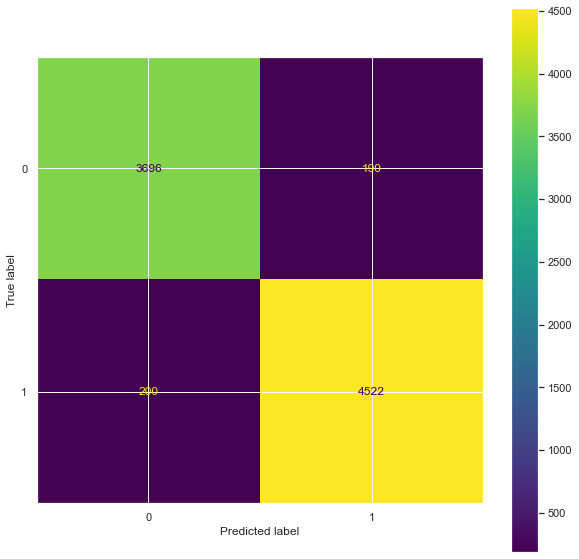

In [237]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridKNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridKNN.classes_)

disp.plot()
plt.show()

In [238]:
LG = LogisticRegression().fit(X_train, y_train)
#prediction
y_pred_test = LG.predict(X_test)
y_pred_train = LG.predict(X_train)
#scores
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7675536480686695
0.7707946096654275


In [239]:
 # defining parameter range
param_grid = {'penalty':['l1','l2'],
                'Cs': [2,5,10,20], 
                'cv': [4],
                'solver': ['liblinear','saga']}  
gridLG = GridSearchCV(LogisticRegressionCV(), param_grid, refit = True, verbose = 3)
    
  # fitting the model for grid search
gridLG.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.765 total time=   0.2s
[CV 2/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.767 total time=   0.1s
[CV 3/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.772 total time=   0.1s
[CV 4/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.763 total time=   0.1s
[CV 5/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.768 total time=   0.1s
[CV 1/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.765 total time=   0.2s
[CV 2/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.767 total time=   0.2s
[CV 3/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.772 total time=   0.2s
[CV 4/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.763 total time=   0.2s
[CV 5/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.768 total time=   0.2s
[CV 1/5] END Cs=2, cv=4, penalty=l2, solver=liblinear;, score=0.765 total time=   0.1s
[CV 2/5

GridSearchCV(estimator=LogisticRegressionCV(),
             param_grid={'Cs': [2, 5, 10, 20], 'cv': [4],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [240]:
print(gridLG.best_params_)

{'Cs': 10, 'cv': 4, 'penalty': 'l1', 'solver': 'saga'}


In [241]:
y_pred_test = gridLG.predict(X_test)
y_pred_train = gridLG.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7675536480686695
0.7707946096654275


In [242]:
resultsLG = train_evaluate_model(y_test)
resultsLG.index = ['Logistic Regression - Method 1']
results = results.append(resultsLG)

results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/2403315288.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsLG)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.954693,0.958660,0.959677,0.957645,0.954376,0.954376
Logistic Regression - Method 1,0.770795,0.802245,0.761560,0.847522,0.762541,0.762541


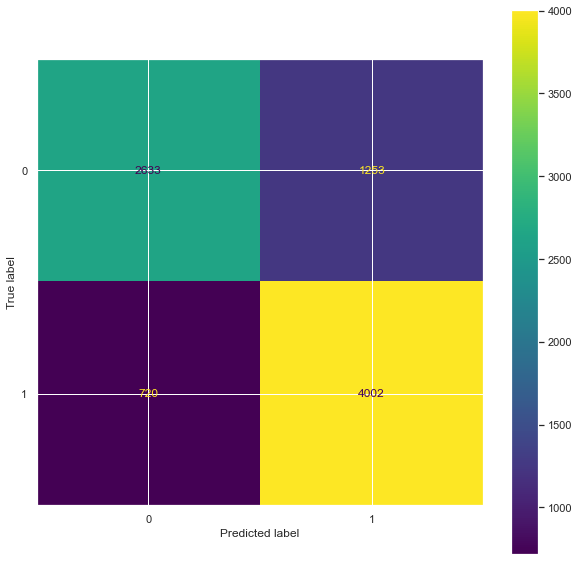

In [243]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridLG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridLG.classes_)

disp.plot()
plt.show()

In [244]:
cv_N = 10
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB()
      }
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.7438630001873103, 'bernoulli': 0.7640062925787129}

In [245]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

y_pred_test = GNB.predict(X_test)
y_pred_train = GNB.predict(X_train)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7438626609442061
0.7494191449814126


In [246]:
resultsNB = train_evaluate_model(y_test)
resultsNB.index = ['Naive Bayes - Method 1']
results = results.append(resultsNB)

results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/1729499558.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsNB)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.954693,0.958660,0.959677,0.957645,0.954376,0.954376
Logistic Regression - Method 1,0.770795,0.802245,0.761560,0.847522,0.762541,0.762541
Naive Bayes - Method 1,0.749419,0.775850,0.761681,0.790555,0.744994,0.744994


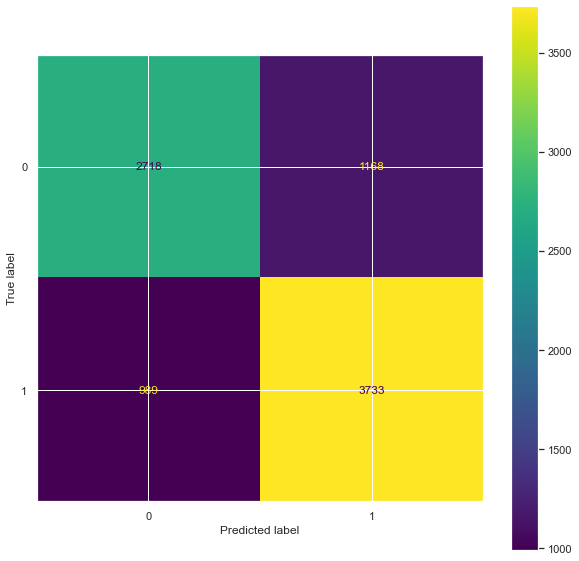

In [247]:
cm = confusion_matrix(y_test, y_pred_test, labels=GNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=GNB.classes_)

disp.plot()
plt.show()

In [248]:
param_grid = {'C': [1,10,100,1000], 
                'gamma': [1, 0.1, 0.01, 0.001],
                'kernel': ['rbf']}

gridSVM = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)
    
  # fitting the model for grid search
gridSVM.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.839 total time=   5.5s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.838 total time=   5.3s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.802 total time=   6.7s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.802 total time=   6.8s
[CV 1/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.757 total time=   7.2s
[CV 2/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.777 total time=   7.3s
[CV 1/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.765 total time=   7.9s
[CV 2/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.768 total time=   7.9s
[CV 1/2] END .........C=10, gamma=1, kernel=rbf;, score=0.844 total time=   5.4s
[CV 2/2] END .........C=10, gamma=1, kernel=rbf;, score=0.840 total time=   5.2s
[CV 1/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.814 total time=   8.5s
[CV 2/2] END .......C=10, gamma=0.1, kernel=rbf;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [249]:
print(gridSVM.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [250]:
y_pred_test = gridSVM.predict(X_test)
y_pred_train = gridSVM.predict(X_train)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8684978540772532
0.8729089219330854


In [251]:
resultsSVM = train_evaluate_model(y_test)
resultsSVM.index = ['Support Vector Machine - Method 1']
results = results.append(resultsSVM)

results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/3810661069.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsSVM)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.954693,0.958660,0.959677,0.957645,0.954376,0.954376
Logistic Regression - Method 1,0.770795,0.802245,0.761560,0.847522,0.762541,0.762541
Naive Bayes - Method 1,0.749419,0.775850,0.761681,0.790555,0.744994,0.744994
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526


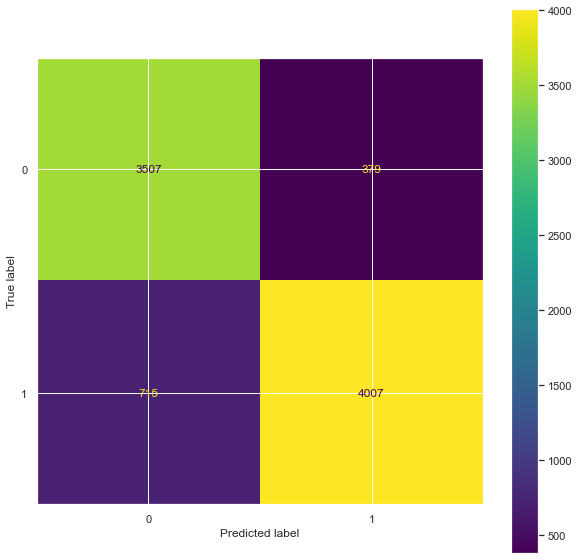

In [252]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridSVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridSVM.classes_)

disp.plot()
plt.show()

In [253]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

# defining parameter range
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}  
gridDT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, n_jobs=-1)
  
# fitting the model for grid search
gridDT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 16, 2),
                         'max_features': range(1, 6)})

In [254]:
print(gridDT.best_params_)

{'max_depth': 15, 'max_features': 1}


In [255]:
y_pred_test = gridDT.predict(X_test)
y_pred_train = gridDT.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9600572246065808
0.9551579925650557


In [256]:
resultsDT = train_evaluate_model(y_test)
resultsDT.index = ['Decision Trees - Method 1']
results = results.append(resultsDT)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/3196929587.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsDT)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.954693,0.958660,0.959677,0.957645,0.954376,0.954376
Logistic Regression - Method 1,0.770795,0.802245,0.761560,0.847522,0.762541,0.762541
Naive Bayes - Method 1,0.749419,0.775850,0.761681,0.790555,0.744994,0.744994
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


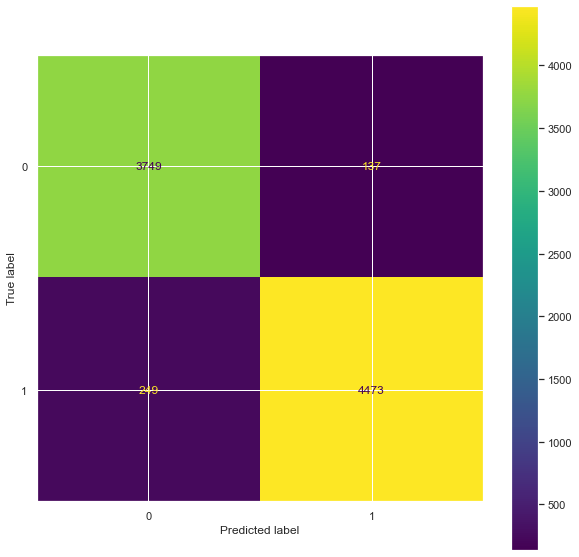

In [257]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridDT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridDT.classes_)

disp.plot()
plt.show()

In [258]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridRF = GridSearchCV(RF, param_grid)
  
# fitting the model for grid search
gridRF.fit(X_train, y_train)

/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_fores

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42,
                                              warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

In [259]:
print(gridRF.best_params_)

{'n_estimators': 15}


In [260]:
y_pred_test = gridRF.predict(X_test)
y_pred_train = gridRF.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9600572246065808
0.9551579925650557


In [261]:
resultsRF = train_evaluate_model(y_test)
resultsRF.index = ['Random Forest - Method 1']
results = results.append(resultsRF)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/143072221.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsRF)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.954693,0.958660,0.959677,0.957645,0.954376,0.954376
Logistic Regression - Method 1,0.770795,0.802245,0.761560,0.847522,0.762541,0.762541
Naive Bayes - Method 1,0.749419,0.775850,0.761681,0.790555,0.744994,0.744994
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


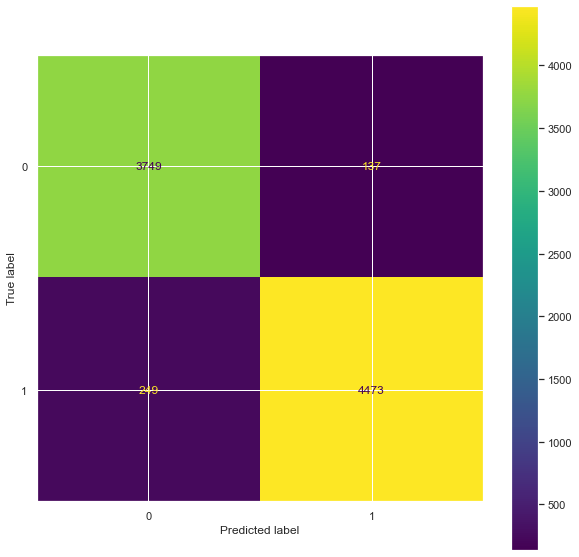

In [262]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridRF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridRF.classes_)

disp.plot()
plt.show()

In [263]:
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridEF = GridSearchCV(EF, param_grid)
  
# fitting the model for grid search
gridEF.fit(X_train, y_train)

/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_fores

GridSearchCV(estimator=ExtraTreesClassifier(bootstrap=True, n_jobs=-1,
                                            oob_score=True, random_state=42,
                                            warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

In [264]:
print(gridEF.best_params_)

{'n_estimators': 15}


In [265]:
y_pred_test = gridEF.predict(X_test)
y_pred_train = gridEF.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9600572246065808
0.9551579925650557


In [266]:
resultsEF = train_evaluate_model(y_test)
resultsEF.index = ['Extra Trees - Method 1']
results = results.append(resultsEF)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/162385805.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsEF)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.954693,0.958660,0.959677,0.957645,0.954376,0.954376
Logistic Regression - Method 1,0.770795,0.802245,0.761560,0.847522,0.762541,0.762541
Naive Bayes - Method 1,0.749419,0.775850,0.761681,0.790555,0.744994,0.744994
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


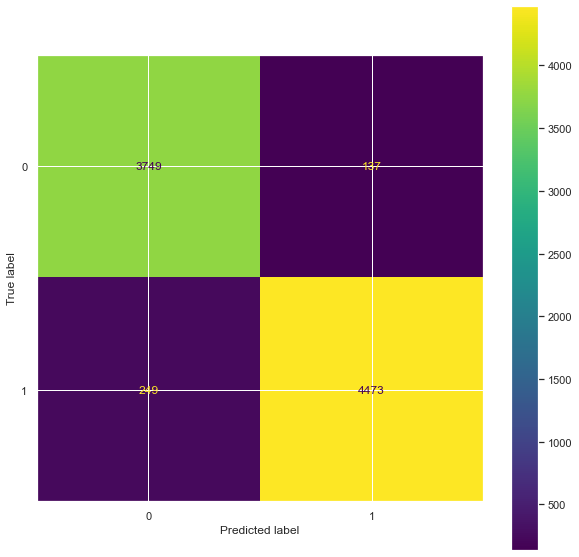

In [267]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridRF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridRF.classes_)

disp.plot()
plt.show()

In [268]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [0.8,0.5,0.1, 0.01]}

# defining parameter range
gridGB = GridSearchCV(GradientBoostingClassifier(subsample=0.5,
                                                  max_features=6,
                                                  random_state=42), 
                                                  param_grid=param_grid, 
                                                  scoring='accuracy',
                                                  n_jobs=-1)
  
# fitting the model for grid search
gridGB.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_features=6,
                                                  random_state=42,
                                                  subsample=0.5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

In [269]:
print(gridGB.best_params_)

{'learning_rate': 0.5, 'n_estimators': 200}


In [270]:
y_pred_test = gridGB.predict(X_test)
y_pred_train = gridGB.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9591416309012876
0.9572490706319703


In [271]:
resultsGB = train_evaluate_model(y_test)
resultsGB.index = ['Gradient Boosting - Method 1']
results = results.append(resultsGB)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/3410373561.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsGB)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.954693,0.958660,0.959677,0.957645,0.954376,0.954376
Logistic Regression - Method 1,0.770795,0.802245,0.761560,0.847522,0.762541,0.762541
Naive Bayes - Method 1,0.749419,0.775850,0.761681,0.790555,0.744994,0.744994
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596


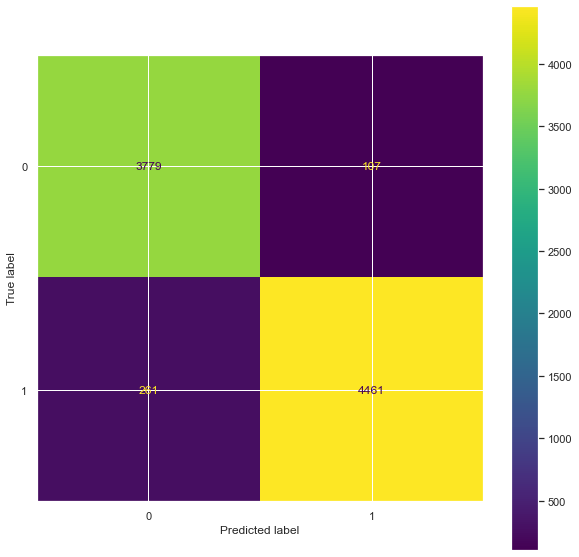

In [272]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridGB.classes_)

disp.plot()
plt.show()

In [273]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [1,0.8,0.5,0.1, 0.01]}
AB = AdaBoostClassifier(DecisionTreeClassifier(max_features=6))
# defining parameter range
gridAB = GridSearchCV(AB,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)
# fitting the model for grid search
gridAB.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_features=6)),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

In [274]:
print(gridAB.best_params_)

{'learning_rate': 0.8, 'n_estimators': 400}


In [275]:
y_pred_test = gridAB.predict(X_test)
y_pred_train = gridAB.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9600572246065808
0.9551579925650557


In [276]:
resultsAB = train_evaluate_model(y_test)
resultsAB.index = ['Ada Boost - Method 1']
results = results.append(resultsAB)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/3485686748.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsAB)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.954693,0.958660,0.959677,0.957645,0.954376,0.954376
Logistic Regression - Method 1,0.770795,0.802245,0.761560,0.847522,0.762541,0.762541
Naive Bayes - Method 1,0.749419,0.775850,0.761681,0.790555,0.744994,0.744994
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


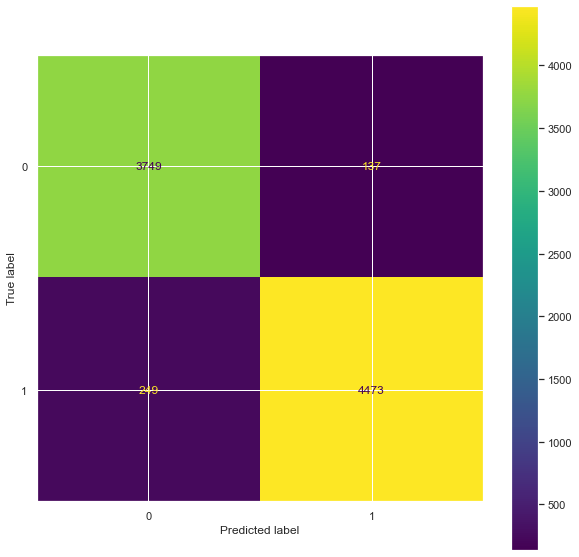

In [277]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridAB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridAB.classes_)

disp.plot()
plt.show()

In [278]:
estimators = [('Decision Trees', gridDT), ('Random Forest', gridRF)]
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_fores

In [279]:
y_pred_test = VC.predict(X_test)
y_pred_train = VC.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9600572246065808
0.9551579925650557


In [280]:
resultsVC = train_evaluate_model(y_test)
resultsVC.index = ['Stacking Voting - Method 1']
results = results.append(resultsVC)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/374672978.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsVC)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.954693,0.958660,0.959677,0.957645,0.954376,0.954376
Logistic Regression - Method 1,0.770795,0.802245,0.761560,0.847522,0.762541,0.762541
Naive Bayes - Method 1,0.749419,0.775850,0.761681,0.790555,0.744994,0.744994
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Stacking Voting - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


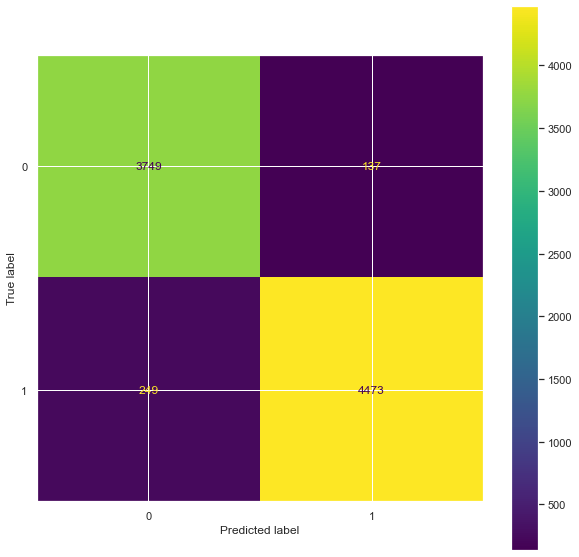

In [281]:
cm = confusion_matrix(y_test, y_pred_test, labels=VC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=VC.classes_)

disp.plot()
plt.show()

In [283]:
#With feature selection
mms = MinMaxScaler()
hypertesion_data[['cp']] = mms.fit_transform(hypertesion_data[['cp']])
hypertesion_data[['slope_down slope']] = mms.fit_transform(hypertesion_data[['slope_down slope']])
hypertesion_data[['slope_normal']] = mms.fit_transform(hypertesion_data[['slope_normal']])
hypertesion_data[['thalach']] = mms.fit_transform(hypertesion_data[['thalach']])
hypertesion_data[['restecg']] = mms.fit_transform(hypertesion_data[['restecg']])
hypertesion_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target,slope_down slope,slope_normal,slope_up slope
0,57.0,1.0,1.000000,0.481132,0.244292,1,0.0,0.603053,0,2.3,0,1,1,0.0,0.0,1.0
1,64.0,0.0,0.666667,0.339623,0.283105,0,0.5,0.885496,0,3.5,0,2,1,0.0,0.0,1.0
2,52.0,1.0,0.333333,0.339623,0.178082,0,0.0,0.770992,0,1.4,0,2,1,1.0,0.0,0.0
3,56.0,0.0,0.333333,0.245283,0.251142,0,0.5,0.816794,0,0.8,0,2,1,1.0,0.0,0.0
4,66.0,0.0,0.000000,0.245283,0.520548,0,0.5,0.702290,1,0.6,0,2,1,1.0,0.0,0.0


In [284]:
y = (hypertesion_data['target']).astype(int)
X = hypertesion_data[['cp','slope_down slope','slope_normal','thalach','restecg']]

[0.24780007 0.09381944 0.06277229 0.54724488 0.04836332]


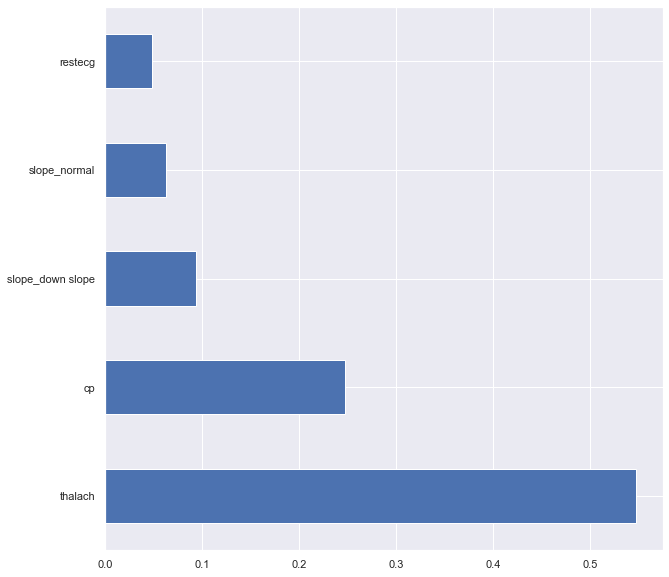

In [285]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [290]:
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 4 best features

              Specs        Score
1  slope_down slope  2150.936239
2      slope_normal  1801.772365
0                cp  1789.566335
3           thalach   232.239305


In [289]:
#Create a logistic regression classifier
lr = LogisticRegression()
# Create an EFS object
efs = EFS(estimator=lr,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=5,      # The maximum number of features to consider is 4
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
          cv=4)                # The number of cross-validations to perform is 4

# Train EFS with our dataset
efs = efs.fit(X, y)
# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names

Features: 31/31

Best accuracy score: 0.77
Best subset (indices): (0, 1, 3, 4)
Best subset (corresponding names): ('cp', 'slope_down slope', 'thalach', 'restecg')


In [94]:
#It's more likely using top 3 ranked features('cp', 'down slope' and 'thalach')
y = (hypertesion_data['target']).astype(int)
X = hypertesion_data[['cp','thalach','slope_down slope']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [95]:
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19],  #odd numbers because there are 2 classes in target coulmn
              'weights': ['distance', 'uniform']}  
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridKNN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.921 total time=   0.1s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.929 total time=   0.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.926 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.924 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.915 total time=   0.1s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.921 total time=   0.2s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.929 total time=   0.2s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.926 total time=   0.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.924 total time=   0.2s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.915 total time=   0.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.921 total time=   0.1s
[CV 2/5] END ...n_neighbors=3, weights=distance

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['distance', 'uniform']},
             verbose=3)

In [96]:
print(gridKNN.best_params_)

{'n_neighbors': 5, 'weights': 'distance'}


In [97]:
y_pred_test = gridKNN.predict(X_test)
y_pred_train = gridKNN.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9220615620549896
0.9215335463258786


In [98]:
resultsKNN2 = train_evaluate_model(y_test)
resultsKNN2.index = ['K Nearest Neighbors - Method 2']
results = results.append(resultsKNN2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/2379876878.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsKNN2)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.953764,0.957542,0.964746,0.950445,0.954121,0.954121
Logistic Regression - Method 1,0.769865,0.802394,0.758439,0.851758,0.761056,0.761056
Naive Bayes - Method 1,0.728857,0.748762,0.761384,0.736552,0.728029,0.728029
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Stacking Voting - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


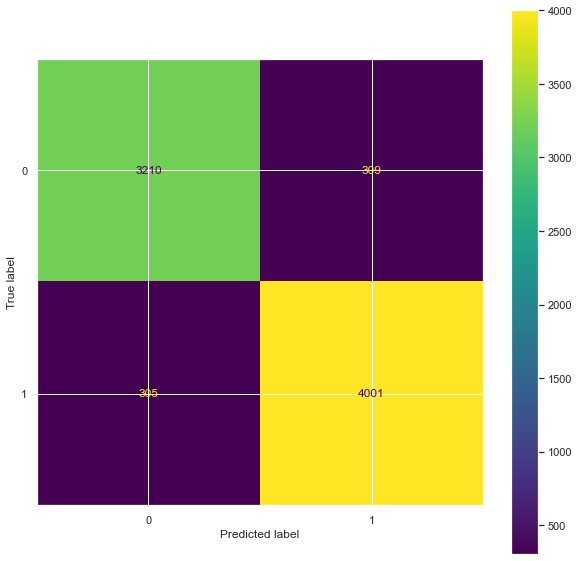

In [99]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridKNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridKNN.classes_)

disp.plot()
plt.show()

In [100]:
LG = LogisticRegression().fit(X_train, y_train)
#prediction
y_pred_test = LG.predict(X_test)
y_pred_train = LG.predict(X_train)
#scores
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7494796801402125
0.7478594249201278


In [101]:
param_grid = {'penalty':['l1','l2'],
                'Cs': [2,5,10,20], 
                'cv': [4],
                'solver': ['liblinear','saga']}  
gridLG = GridSearchCV(LogisticRegressionCV(), param_grid, refit = True, verbose = 3)
    
  # fitting the model for grid search
gridLG.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.747 total time=   0.3s
[CV 2/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.752 total time=   0.3s
[CV 3/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.746 total time=   0.3s
[CV 4/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.750 total time=   0.2s
[CV 5/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.758 total time=   0.3s
[CV 1/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.747 total time=   0.2s
[CV 2/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.752 total time=   0.2s
[CV 3/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.746 total time=   0.2s
[CV 4/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.750 total time=   0.2s
[CV 5/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.758 total time=   0.2s
[CV 1/5] END Cs=2, cv=4, penalty=l2, solver=liblinear;, score=0.747 total time=   0.1s
[CV 2/5

GridSearchCV(estimator=LogisticRegressionCV(),
             param_grid={'Cs': [2, 5, 10, 20], 'cv': [4],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [102]:
y_pred_test = gridLG.predict(X_test)
y_pred_train = gridLG.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7595574542666228
0.7539936102236422


In [103]:
resultsLG2 = train_evaluate_model(y_test)
resultsLG2.index = ['Logistic Regression - Method 2']
results = results.append(resultsLG2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/2598149167.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsLG2)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.953764,0.957542,0.964746,0.950445,0.954121,0.954121
Logistic Regression - Method 1,0.769865,0.802394,0.758439,0.851758,0.761056,0.761056
Naive Bayes - Method 1,0.728857,0.748762,0.761384,0.736552,0.728029,0.728029
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Stacking Voting - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


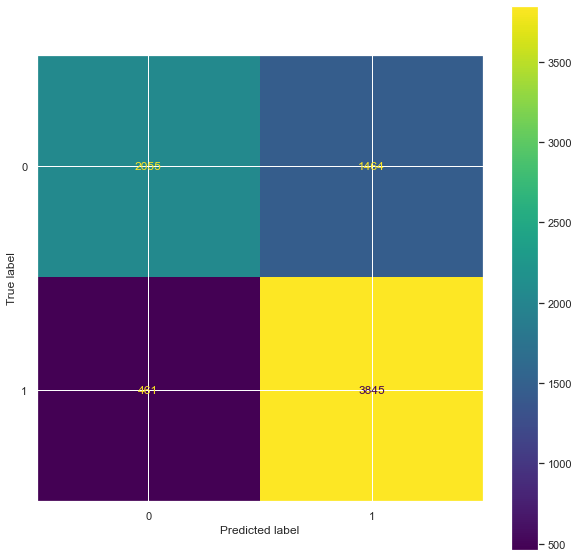

In [104]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridLG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridLG.classes_)

disp.plot()
plt.show()

In [105]:
cv_N = 10
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB()
      }
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.7510685231586369, 'bernoulli': 0.7619136971297393}

In [106]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [107]:
y_pred_test = GNB.predict(X_test)
y_pred_train = GNB.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7510680249753533
0.7523322683706071


In [108]:
resultsNB2 = train_evaluate_model(y_test)
resultsNB2.index = ['Naive Bayes - Method 2']
results = results.append(resultsNB2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/1088990190.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsNB2)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.953764,0.957542,0.964746,0.950445,0.954121,0.954121
Logistic Regression - Method 1,0.769865,0.802394,0.758439,0.851758,0.761056,0.761056
Naive Bayes - Method 1,0.728857,0.748762,0.761384,0.736552,0.728029,0.728029
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Stacking Voting - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


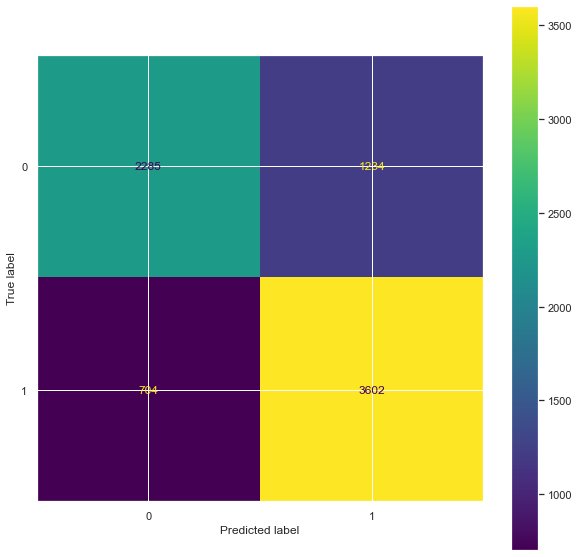

In [109]:
cm = confusion_matrix(y_test, y_pred_test, labels=GNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=GNB.classes_)

disp.plot()
plt.show()

In [110]:
param_grid = {'C': [1,10,100,1000], 
                'gamma': [1, 0.1, 0.01, 0.001],
                'kernel': ['rbf']} 
    
gridSVM = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)
    
  # fitting the model for grid search
gridSVM.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.767 total time=   8.2s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.773 total time=   9.1s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.751 total time=   7.8s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.759 total time=   8.0s
[CV 1/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.739 total time=   8.3s
[CV 2/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.744 total time=   8.7s
[CV 1/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.727 total time=  10.7s
[CV 2/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.708 total time=  10.6s
[CV 1/2] END .........C=10, gamma=1, kernel=rbf;, score=0.778 total time=   9.1s
[CV 2/2] END .........C=10, gamma=1, kernel=rbf;, score=0.780 total time=   9.9s
[CV 1/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.767 total time=   7.8s
[CV 2/2] END .......C=10, gamma=0.1, kernel=rbf;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [111]:
print(gridSVM.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [112]:
y_pred_test = gridSVM.predict(X_test)
y_pred_train = gridSVM.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7864497754409027
0.7796805111821086


In [113]:
resultsSVM2 = train_evaluate_model(y_test)
resultsSVM2.index = ['Support Vector Machine - Method 2']
results = results.append(resultsSVM2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/3645259320.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsSVM2)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.953764,0.957542,0.964746,0.950445,0.954121,0.954121
Logistic Regression - Method 1,0.769865,0.802394,0.758439,0.851758,0.761056,0.761056
Naive Bayes - Method 1,0.728857,0.748762,0.761384,0.736552,0.728029,0.728029
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Stacking Voting - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


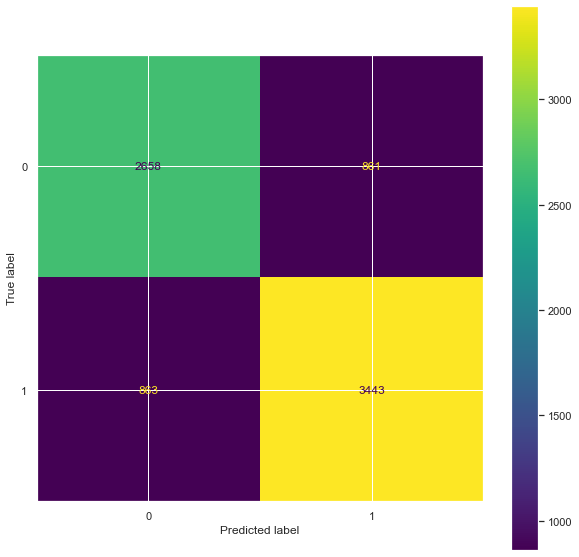

In [114]:
cm = confusion_matrix(y_test, y_pred_test, labels=GNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=GNB.classes_)

disp.plot()
plt.show()

In [115]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}  
gridDT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, n_jobs=-1)
  
# fitting the model for grid search
gridDT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 16, 2),
                         'max_features': range(1, 4)})

In [116]:
print(gridDT.best_params_)

{'max_depth': 15, 'max_features': 1}


In [117]:
y_pred_test = gridDT.predict(X_test)
y_pred_train = gridDT.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9318654836236171
0.9267731629392971


In [118]:
resultsDT2 = train_evaluate_model(y_test)
resultsDT2.index = ['Decision Trees - Method 2']
results = results.append(resultsDT2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/2200591120.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsDT2)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.953764,0.957542,0.964746,0.950445,0.954121,0.954121
Logistic Regression - Method 1,0.769865,0.802394,0.758439,0.851758,0.761056,0.761056
Naive Bayes - Method 1,0.728857,0.748762,0.761384,0.736552,0.728029,0.728029
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Stacking Voting - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


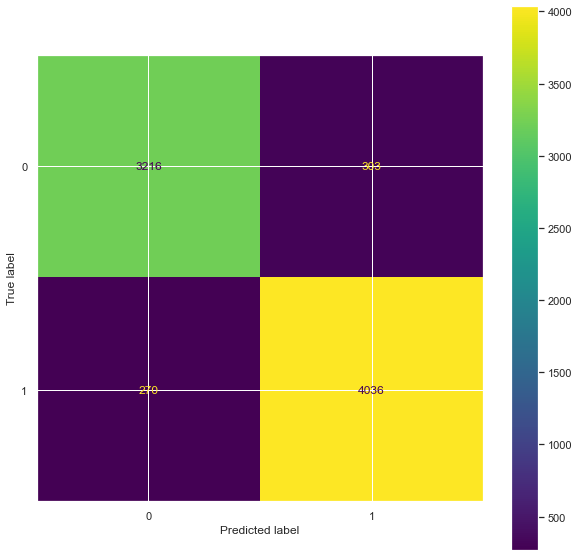

In [119]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridDT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridDT.classes_)

disp.plot()
plt.show()

In [120]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridRF = GridSearchCV(RF, param_grid)
  
# fitting the model for grid search
gridRF.fit(X_train, y_train)

/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_fores

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42,
                                              warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

In [121]:
print(gridRF.best_params_)

{'n_estimators': 200}


In [122]:
y_pred_test = gridRF.predict(X_test)
y_pred_train = gridRF.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9318654836236171
0.9267731629392971


In [123]:
resultsRF2 = train_evaluate_model(y_test)
resultsRF2.index = ['Random Forest - Method 2']
results = results.append(resultsRF2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/2502023712.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsRF2)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.953764,0.957542,0.964746,0.950445,0.954121,0.954121
Logistic Regression - Method 1,0.769865,0.802394,0.758439,0.851758,0.761056,0.761056
Naive Bayes - Method 1,0.728857,0.748762,0.761384,0.736552,0.728029,0.728029
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Stacking Voting - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


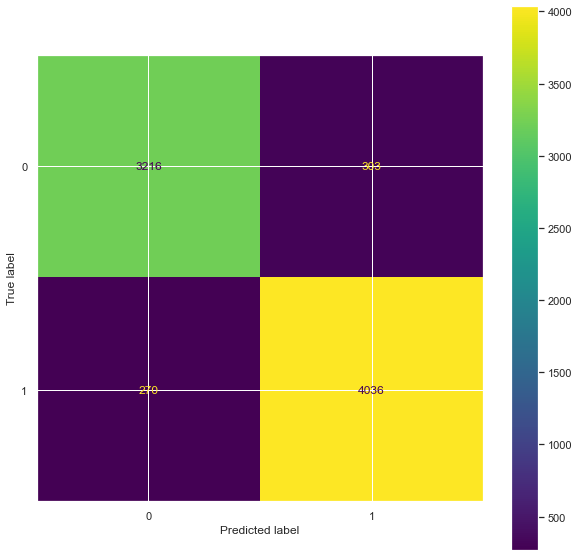

In [124]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridRF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridRF.classes_)

disp.plot()
plt.show()

In [125]:
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridEF = GridSearchCV(EF, param_grid)
  
# fitting the model for grid search
gridEF.fit(X_train, y_train)

/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_fores

GridSearchCV(estimator=ExtraTreesClassifier(bootstrap=True, n_jobs=-1,
                                            oob_score=True, random_state=42,
                                            warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

In [126]:
print(gridEF.best_params_)

{'n_estimators': 200}


In [127]:
y_pred_test = gridEF.predict(X_test)
y_pred_train = gridEF.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9318654836236171
0.9267731629392971


In [128]:
resultsEF2 = train_evaluate_model(y_test)
resultsEF2.index = ['Extra Trees - Method 2']
results = results.append(resultsEF2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/3408495484.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsEF2)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.953764,0.957542,0.964746,0.950445,0.954121,0.954121
Logistic Regression - Method 1,0.769865,0.802394,0.758439,0.851758,0.761056,0.761056
Naive Bayes - Method 1,0.728857,0.748762,0.761384,0.736552,0.728029,0.728029
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Stacking Voting - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


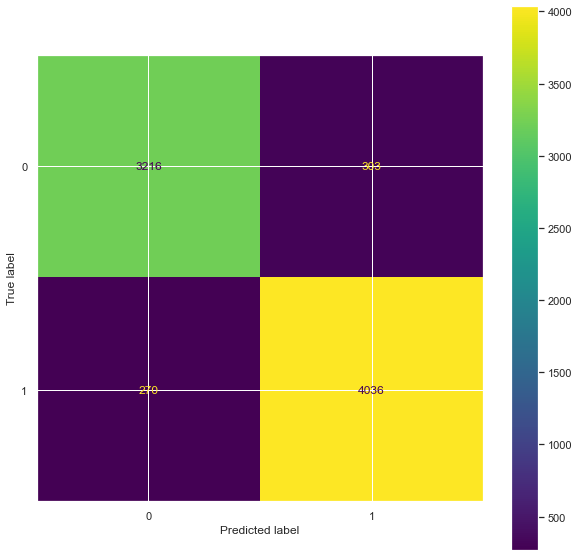

In [129]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridEF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridEF.classes_)

disp.plot()
plt.show()

In [130]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [0.8,0.5,0.1, 0.01]}

# defining parameter range
gridGB = GridSearchCV(GradientBoostingClassifier(subsample=0.5,
                                                  max_features=6,
                                                  random_state=42), 
                                                  param_grid=param_grid, 
                                                  scoring='accuracy',
                                                  n_jobs=-1)
  
# fitting the model for grid search
gridGB.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_features=6,
                                                  random_state=42,
                                                  subsample=0.5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

In [131]:
print(gridGB.best_params_)

{'learning_rate': 0.5, 'n_estimators': 200}


In [132]:
y_pred_test = gridGB.predict(X_test)
y_pred_train = gridGB.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9316464015773908
0.9285623003194888


In [133]:
resultsGB2 = train_evaluate_model(y_test)
resultsGB2.index = ['Gradient Boosting - Method 2']
results = results.append(resultsGB2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/941071743.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsGB2)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.953764,0.957542,0.964746,0.950445,0.954121,0.954121
Logistic Regression - Method 1,0.769865,0.802394,0.758439,0.851758,0.761056,0.761056
Naive Bayes - Method 1,0.728857,0.748762,0.761384,0.736552,0.728029,0.728029
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Stacking Voting - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


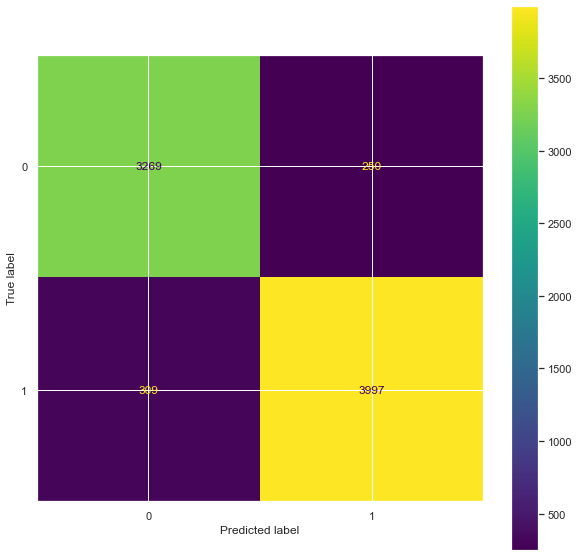

In [134]:
cm = confusion_matrix(y_test, y_pred_test, labels=gridGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gridGB.classes_)

disp.plot()
plt.show()

In [135]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [1,0.8,0.5,0.1, 0.01]}
AB = AdaBoostClassifier(DecisionTreeClassifier(max_features=6))
# defining parameter range
gridAB = GridSearchCV(AB,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)
# fitting the model for grid search
gridAB.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_features=6)),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

In [136]:
print(gridAB.best_params_)

{'learning_rate': 1, 'n_estimators': 100}


In [137]:
y_pred_test = gridAB.predict(X_test)
y_pred_train = gridAB.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9318654836236171
0.9267731629392971


In [138]:
resultsAB2 = train_evaluate_model(y_test)
resultsAB2.index = ['Ada Boost - Method 2']
results = results.append(resultsAB2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/2288110681.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsAB2)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.953764,0.957542,0.964746,0.950445,0.954121,0.954121
Logistic Regression - Method 1,0.769865,0.802394,0.758439,0.851758,0.761056,0.761056
Naive Bayes - Method 1,0.728857,0.748762,0.761384,0.736552,0.728029,0.728029
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Stacking Voting - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


In [139]:
estimators = [('KNN', gridKNN), ('Random Forest', gridRF)]
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.921 total time=   0.1s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.929 total time=   0.1s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.926 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.924 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.915 total time=   0.0s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.921 total time=   0.2s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.929 total time=   0.2s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.926 total time=   0.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.924 total time=   0.2s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.915 total time=   0.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.921 total time=   0.1s
[CV 2/5] END ...n_neighbors=3, weights=distance

/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/wiizh/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_fores

In [140]:
y_pred_test = VC.predict(X_test)
y_pred_train = VC.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9294555811151276
0.9277955271565496


In [141]:
resultsVC2 = train_evaluate_model(y_test)
resultsVC2.index = ['Stacking Voting - Method 2']
results = results.append(resultsVC2)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

/var/folders/rz/zl6hf1ds4sz4m5vqhxw5klh00000gn/T/ipykernel_73606/1848185463.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsVC2)


,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.953764,0.957542,0.964746,0.950445,0.954121,0.954121
Logistic Regression - Method 1,0.769865,0.802394,0.758439,0.851758,0.761056,0.761056
Naive Bayes - Method 1,0.728857,0.748762,0.761384,0.736552,0.728029,0.728029
Support Vector Machine - Method 1,0.872909,0.879886,0.913589,0.848581,0.875526,0.875526
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Stacking Voting - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007


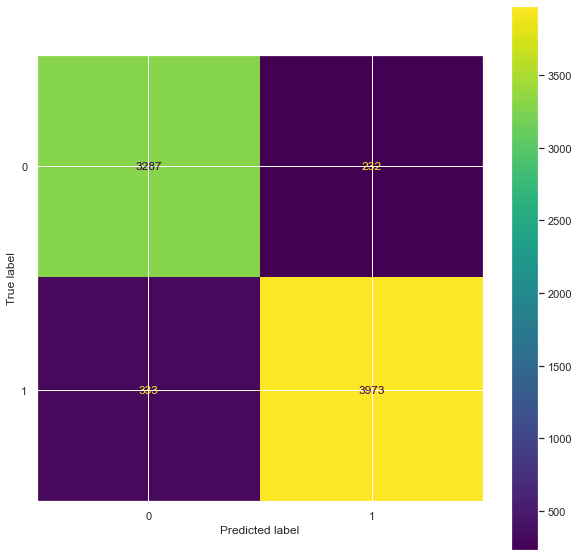

In [142]:
cm = confusion_matrix(y_test, y_pred_test, labels=VC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=VC.classes_)

disp.plot()
plt.show()

In [143]:
results.sort_values(results.columns[0], ascending = False)

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Gradient Boosting - Method 1,0.957249,0.960388,0.976576,0.944727,0.958596,0.958596
Ada Boost - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Stacking Voting - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Decision Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Random Forest - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
Extra Trees - Method 1,0.955158,0.958637,0.970282,0.947268,0.956007,0.956007
K Nearest Neighbors - Method 1,0.953764,0.957542,0.964746,0.950445,0.954121,0.954121
Gradient Boosting - Method 2,0.928562,0.934643,0.941135,0.928240,0.928598,0.928598
Stacking Voting - Method 2,0.927796,0.933615,0.944828,0.922666,0.928369,0.928369
Decision Trees - Method 2,0.926773,0.933719,0.930168,0.937297,0.925596,0.925596
